# Jupyter notebook - PCA and Factor Analysis 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import linalg
import pandas as pd
import random

from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.covariance import ShrunkCovariance, LedoitWolf
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [26]:
# We need to create fake adn synthetic data
n_samples, n_features, rank = 1000, 50, 10
sigma = 1
rng = np.random.RandomState(8)

rand_data = rng.randn(n_features, n_features)
U, _, _ = linalg.svd(rand_data)     # singular value decoposition and we keep the 
                                    # left eigenvect

# np.dot(), it does the by product of two matrices or scalars, or matrix and vector
# it has 10 features but a rank of 10.
# we need to transpose U.
X = np.dot(rng.randn(n_samples, rank), U[:,:rank].T)

In [12]:
# aa = rng.randn(n_samples, n_features)
# aa[:,0]   # first column

In [33]:
# add homosked noise
X_homo = X + sigma*rng.randn(n_samples, n_features)

In [38]:
# add heterosked noise
sigmas = sigma * rng.randn(n_features) + sigma/2.  # each feature has a different sigma
X_het = X + rng.randn(n_samples, n_features) * sigmas

# Fit the model

In [41]:
n_components = np.arange(0, n_features, 5)  # create a grid with different number of components

In [56]:
# Function to compute cross-validation scores for different number of PC or factors

def compute_scores(X):
    pca = PCA(svd_solver = 'full')
    fa = FactorAnalysis()
    
    pca_scores = []
    fa_scores = []
    
    for n in n_components:
        pca.n_components = n
        fa.n_components = n
        
        pca_scores.append(np.mean(cross_val_score(pca, X, cv = 5)))
        fa_scores.append(np.mean(cross_val_score(fa, X, cv = 5)))
        
    return pca_scores, fa_scores

# Normal data

In [59]:
pca_scores, fa_scores = compute_scores(X)
print(pca_scores)
print(fa_scores)

[-74.05976666436683, -71.23876807134141, -69.47935283386879, -67.92415142832496, -66.18198727037068, -64.09770681420966, -62.16396074685889, -60.3303978285114, -59.17626103174875, -58.51767618627129]
[-64.18279693297006, -60.530811938838404, -57.72240493309895, -57.899776955010246, -57.9821417429214, -58.07836483746323, -58.14366852382655, -58.220463460523355, -58.268902669125964, -58.275290250452734]


In [64]:
# best number of pc and factors
# np.argmax() gives us the index where pca_scores is max.
n_components_pca = n_components[np.argmax(pca_scores)]
n_components_fa = n_components[np.argmax(fa_scores)]

In [65]:
# PCA MLE number of components
pca = PCA(svd_solver='full', n_components='mle')
pca.fit(X)
n_components_pca_mle = pca.n_components_

In [67]:
print("best n_components by PCA CV = %d" % n_components_pca)
print("best n_components by FactorAnalysis CV = %d" % n_components_fa)
print("best n_components by PCA MLE = %d" % n_components_pca_mle)

best n_components by PCA CV = 45
best n_components by FactorAnalysis CV = 10
best n_components by PCA MLE = 48


Text(0.5, 1.0, 'Normal Data: X')

<Figure size 432x288 with 0 Axes>

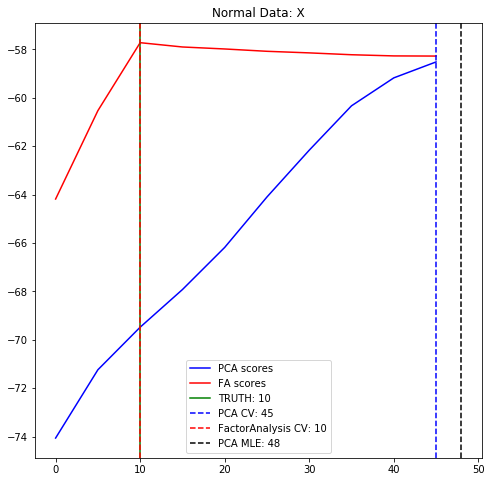

In [73]:
plt.figure()
plt.figure(figsize = (8,8))
plt.plot(n_components, pca_scores, 'b', label='PCA scores')
plt.plot(n_components, fa_scores, 'r', label='FA scores')
plt.axvline(rank, color='g', label='TRUTH: %d' % rank, linestyle='-')
plt.axvline(n_components_pca, color='b',
            label='PCA CV: %d' % n_components_pca, linestyle='--')
plt.axvline(n_components_fa, color='r',
            label='FactorAnalysis CV: %d' % n_components_fa,
            linestyle='--')
plt.axvline(n_components_pca_mle, color='k',
            label='PCA MLE: %d' % n_components_pca_mle, linestyle='--')
plt.legend()
plt.title('Normal Data: X')

# Homosked data

In [74]:
pca_scores, fa_scores = compute_scores(X_homo)
print(pca_scores)
print(fa_scores)

[-75.45868216645196, -75.09493157051295, -74.61647644809405, -74.74904682687483, -74.83774656050167, -74.91945808663414, -75.01570411584248, -75.10827271970439, -75.16927221733259, -75.19163222816003]
[-75.44604336275097, -75.04693647209565, -74.67660383090475, -74.74670148458723, -74.78859638099414, -74.86696786507696, -74.93489268147246, -74.9948157814113, -75.188867467582, -75.19694423405636]


In [75]:
# best number of pc and factors
# np.argmax() gives us the index where pca_scores is max.
n_components_pca = n_components[np.argmax(pca_scores)]
n_components_fa = n_components[np.argmax(fa_scores)]

In [76]:
# PCA MLE number of components
pca = PCA(svd_solver='full', n_components='mle')
pca.fit(X_homo)
n_components_pca_mle = pca.n_components_

print("best n_components by PCA CV = %d" % n_components_pca)
print("best n_components by FactorAnalysis CV = %d" % n_components_fa)
print("best n_components by PCA MLE = %d" % n_components_pca_mle)

best n_components by PCA CV = 10
best n_components by FactorAnalysis CV = 10
best n_components by PCA MLE = 10


Text(0.5, 1.0, 'Homosked Data: X_homo')

<Figure size 432x288 with 0 Axes>

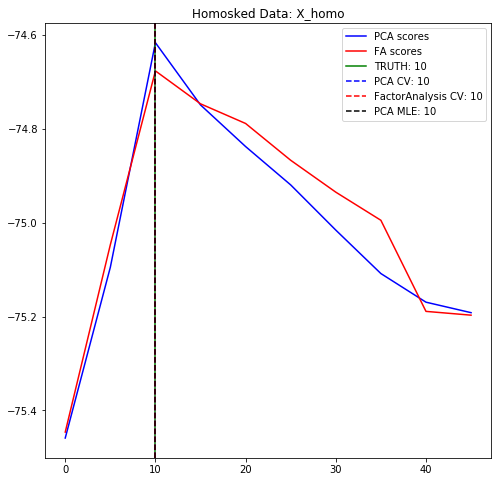

In [78]:
plt.figure()
plt.figure(figsize = (8,8))
plt.plot(n_components, pca_scores, 'b', label='PCA scores')
plt.plot(n_components, fa_scores, 'r', label='FA scores')
plt.axvline(rank, color='g', label='TRUTH: %d' % rank, linestyle='-')
plt.axvline(n_components_pca, color='b',
            label='PCA CV: %d' % n_components_pca, linestyle='--')
plt.axvline(n_components_fa, color='r',
            label='FactorAnalysis CV: %d' % n_components_fa,
            linestyle='--')
plt.axvline(n_components_pca_mle, color='k',
            label='PCA MLE: %d' % n_components_pca_mle, linestyle='--')
plt.legend()
plt.title('Homosked Data: X_homo')

# Heterosked data

In [79]:
pca_scores, fa_scores = compute_scores(X_het)
print(pca_scores)
print(fa_scores)

[-74.05976666436683, -71.23876807134141, -69.47935283386879, -67.92415142832496, -66.18198727037068, -64.09770681420966, -62.16396074685889, -60.3303978285114, -59.17626103174875, -58.51767618627129]
[-64.18279693297006, -60.530811938838404, -57.72240493309895, -57.899776955010246, -57.9821417429214, -58.07836483746323, -58.14366852382655, -58.220463460523355, -58.268902669125964, -58.275290250452734]


In [80]:
# best number of pc and factors
# np.argmax() gives us the index where pca_scores is max.
n_components_pca = n_components[np.argmax(pca_scores)]
n_components_fa = n_components[np.argmax(fa_scores)]

In [81]:
# PCA MLE number of components
pca = PCA(svd_solver='full', n_components='mle')
pca.fit(X_het)
n_components_pca_mle = pca.n_components_

print("best n_components by PCA CV = %d" % n_components_pca)
print("best n_components by FactorAnalysis CV = %d" % n_components_fa)
print("best n_components by PCA MLE = %d" % n_components_pca_mle)

best n_components by PCA CV = 45
best n_components by FactorAnalysis CV = 10
best n_components by PCA MLE = 48


Text(0.5, 1.0, 'Homosked Data: X_het')

<Figure size 432x288 with 0 Axes>

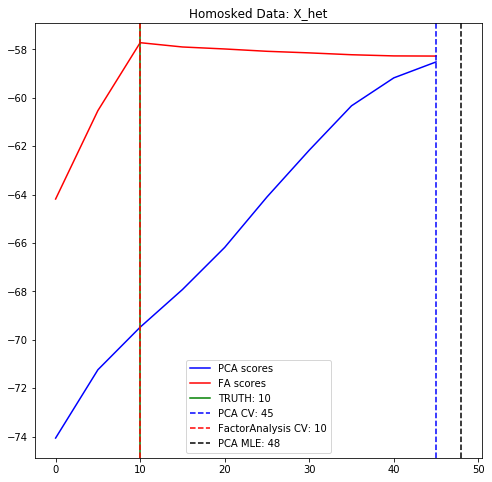

In [83]:
plt.figure()
plt.figure(figsize = (8,8))
plt.plot(n_components, pca_scores, 'b', label='PCA scores')
plt.plot(n_components, fa_scores, 'r', label='FA scores')
plt.axvline(rank, color='g', label='TRUTH: %d' % rank, linestyle='-')
plt.axvline(n_components_pca, color='b',
            label='PCA CV: %d' % n_components_pca, linestyle='--')
plt.axvline(n_components_fa, color='r',
            label='FactorAnalysis CV: %d' % n_components_fa,
            linestyle='--')
plt.axvline(n_components_pca_mle, color='k',
            label='PCA MLE: %d' % n_components_pca_mle, linestyle='--')
plt.legend()
plt.title('Homosked Data: X_het')

# Shrinkage

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV Something about GridSearchCV and how it works.

https://scikit-learn.org/stable/modules/covariance.html#shrunk-covariance 
if we want to read something about shrinkage.

https://scikit-learn.org/stable/modules/generated/sklearn.covariance.LedoitWolf.html#sklearn.covariance.LedoitWolf inpute and output of Ledoit and Wolf shrinkage matrix

In [107]:
def shrunk_cov_score(X):
    grid_shrink_val = np.logspace(-2,0,30)   # grid 0-1 of 30 values
    cv = GridSearchCV(ShrunkCovariance(), {'shrinkage': grid_shrink_val}, cv = 5)
    
    # fit model using CV, so we need to determine the best shrinkage param.
    cv.fit(X)
    cv.cv_results_['mean_test_score'].argmax()  # gives us the index of the best
                                                # shrinkage param during the CV
                                                # validation procedure.
    
    # use only the best model to perform the score exercise.
    # Hence we use the optimal shrinkage param.
    return np.mean(cross_val_score(cv.best_estimator_, X, cv = 5))

In [108]:
shrunk_cov_score(X)

-58.24717030817383

# Ledoit and Wolf

In [118]:
def led_wolf_score(X):
    
    return np.mean(cross_val_score(LedoitWolf(), X, cv = 5))


# methods: LedoitWolf().fit/score/get_params
# after fitting or anything else
# attributes-outputs: location_, covariance_, precision_, shrinkage_
#

In [110]:
led_wolf_score(X)

-59.513197249222756

In [ ]:
# We can add them to the previous graph.